In [ ]:
!pip install opendatasets split-folders --quiet

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import os

%matplotlib inline
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.applications.inception_v3 import InceptionV3
from keras import backend as K
import random
import urllib.request
import matplotlib.image as mpimg

from skimage.filters import rank, threshold_otsu
from skimage import io
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from skimage.morphology import closing, square, disk
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset')
# sdlpkmrmkkml
# 91b742aa9b01dc96ac5940ea43212cdc

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sdlpkmrmkkml
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset


100%|██████████| 2.04G/2.04G [01:00<00:00, 36.0MB/s]


In [ ]:
# Defining the path for train and test images
data_dir = pathlib.Path("/content/plantvillage-dataset/plantvillage dataset/color")
train='/content/plantvillage-dataset/plantvillage dataset/color'

In [ ]:
# Here we have two class.
dataset_path_train = os.listdir(data_dir)
print (dataset_path_train)
print("Types of classes labels found: ", len(dataset_path_train))

['Pepper,_bell___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Tomato___Target_Spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Soybean___healthy', 'Grape___healthy', 'Potato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Black_rot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Blueberry___healthy', 'Peach___Bacterial_spot', 'Potato___Late_blight', 'Corn_(maize)___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Strawberry___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Raspberry___healthy', 'Peach___healthy', 'Grape___Esca_(Black_Measles)', 'Potato___Early_blight', 'Corn_(maize)___Northern_Le

In [ ]:
image_count_train = len(list(data_dir.glob('*/*.JPG')))
print("The number of Train data:",image_count_train)

The number of Train data: 52803


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# For train data set
train_ds = image_dataset_from_directory(data_dir,
                                        seed = 123,
                                        image_size=(img_height, img_width),
                                        validation_split=0.2,
                                        subset='training')

Found 54305 files belonging to 38 classes.
Using 43444 files for training.


In [ ]:
# here we can put the validate data
val_ds = image_dataset_from_directory(data_dir,
                                      seed = 123,
                                      image_size=(img_height, img_width),
                                      validation_split=0.2,
                                      subset='validation')

Found 54305 files belonging to 38 classes.
Using 10861 files for validation.


In [ ]:
test = image_dataset_from_directory(data_dir,
                                      seed = 123,
                                      image_size=(img_height, img_width),
                                      validation_split=None)

Found 54305 files belonging to 38 classes.


In [ ]:
class_names = train_ds.class_names
print(len(class_names))
print( class_names)

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target

In [ ]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 224, 224, 3)
(32,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.layers import Rescaling

# Define the number of classes
num_classes = 38

# Building the model
model = Sequential()
# Rescaling layer
model.add(Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)))
# First convolutional block
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
# Second convolutional block
model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
# Third convolutional block
model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))
# Fully connected layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model

## Your code goes here
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,451,142 (24.61 MB)

 Trainable params: 6,451,142 (24.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 106s 73ms/step - accuracy: 0.5456 - loss: 1.6728 - val_accuracy: 0.8673 - val_loss: 0.4370
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 0.8846 - loss: 0.3708 - val_accuracy: 0.8939 - val_loss: 0.3443
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 71ms/step - accuracy: 0.9385 - loss: 0.1962 - val_accuracy: 0.9120 - val_loss: 0.3019
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 156s 82ms/step - accuracy: 0.9591 - loss: 0.1269 - val_accuracy: 0.9053 - val_loss: 0.3591
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 129s 73ms/step - accuracy: 0.9669 - loss: 0.0982 - val_accuracy: 0.9070 - val_loss: 0.3940
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 107s 79ms/step - accuracy: 0.9754 - loss: 0.0733 - val_accuracy: 0.9104 - val_loss: 0.3637
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 134s 73ms/step - accuracy: 0.9841 - loss: 0.0496 - val_accuracy: 0.9080 - val_loss: 0.4049
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 104s 76ms/step - accuracy: 

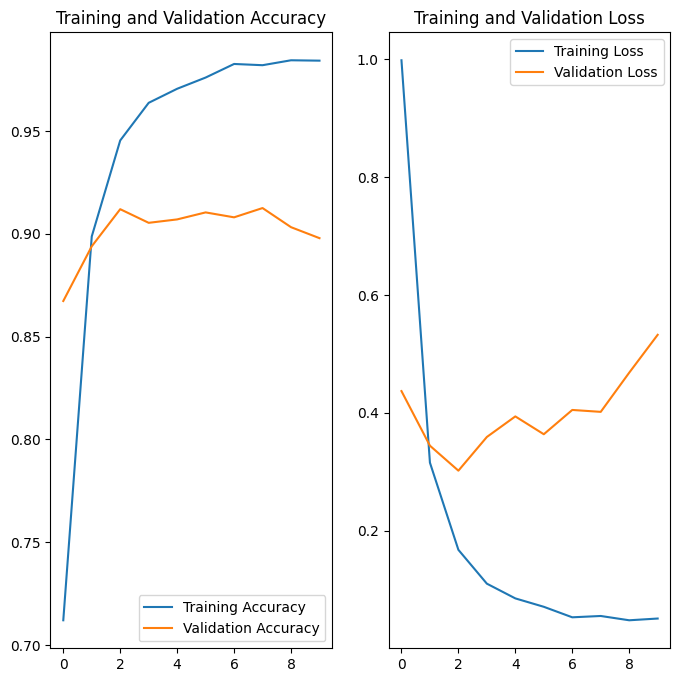

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
preformance = model.evaluate(val_ds)

340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.8988 - loss: 0.5369


actual label: Grape___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
predicted label: Grape___healthy


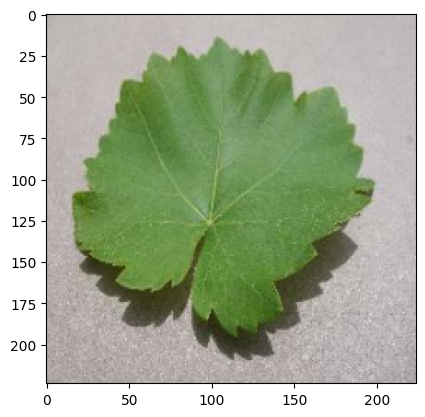

In [ ]:
labels = train_ds.class_names
labels
for images_batch, labels_batch in test.take(1):

    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()

    plt.imshow(image)
    print("actual label:", labels[label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

In [ ]:
from tensorflow import expand_dims, newaxis

def predict(model, img):

    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


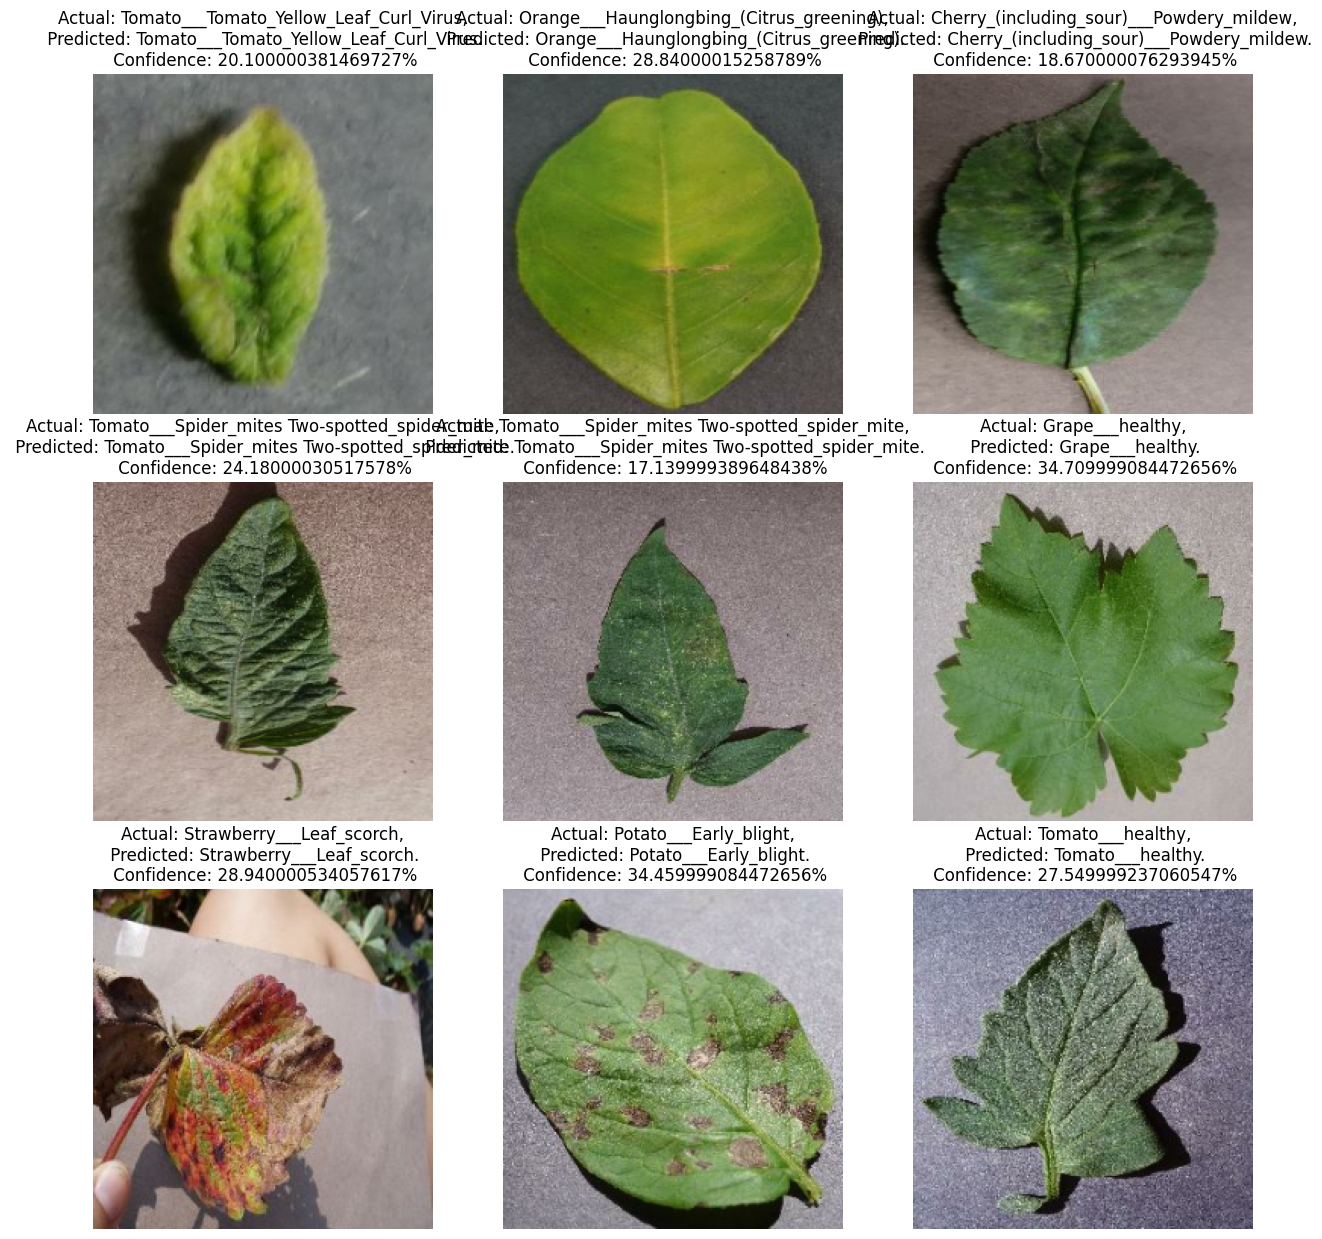

In [ ]:
plt.figure(figsize=(15, 15))

for images, lbs in val_ds.take(1):
    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
model.save("Model.h5")